# Simple Linear Regression


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data1=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S34_L209/Simple_linear_regression.csv")
data1

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


### Reshaping feature dimensionality ...while using single feature

In [4]:
y=data1["GPA"]
x=data1["SAT"] #...its 1d array as currently uncluding 1 feature so we need to reshape it 
x_reshaped=x.values.reshape(-1,1)
x_reshaped.shape



(84, 1)

In [5]:
reg=LinearRegression() #creating instance of LinearRegression class
reg.fit(x_reshaped,y)  #order is (feature,target) ****important to rember order
# below result means that ***reg*** instance of  LR model has stored te intercept and also copied x before fiting the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print('coeff. array',reg.coef_,'\n','R^2',reg.score(x_reshaped,y),'\n','intercept',reg.intercept_)


coeff. array [0.00165569] 
 R^2 0.40600391479679765 
 intercept 0.2750402996602803


### Predicting in simple LR

In [7]:
new_data1=pd.DataFrame(data=[1750,1600],columns=['SAT'])
new_data1

,SAT
0,1750
1,1600


In [8]:
reg.predict(new_data1)

array([3.17249439, 2.92414118])

In [9]:
new_data1['Predicted_GPA']=reg.predict(new_data1)
new_data1

,SAT,Predicted_GPA
0,1750,3.172494
1,1600,2.924141


Text(0, 0.5, 'GPA')

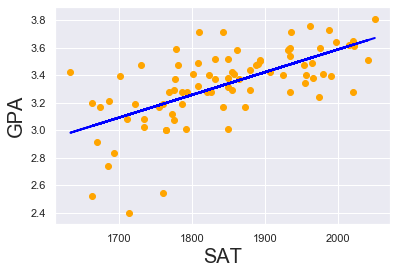

In [10]:
plt.scatter(x,y,c='orange')
yhat=reg.intercept_+reg.coef_[0]*data1['SAT']
fig=plt.plot(x,yhat,c='blue',lw=2,label='Regression Line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)

# MULTIPLE LINEAR REGRESSION

In [11]:
data2=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S34_L213/Multiple_linear_regression.csv")
data2

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [12]:
data2.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


#### No need to reshape this time as we have multidimension arrya...i.e. multiple features are used

In [13]:
y=data2['GPA']
x2=data2[['SAT','Rand 1,2,3']]
x2

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


In [14]:
reg_multiple=LinearRegression()
reg_multiple.fit(x2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### R^2 ,adjusted R^2 ,coefficients,intercept

In [15]:
reg_multiple.score(x2,y)

0.4066811952814285

In [16]:
# adjusted R^2 =1-(1-R^2)*(n-1/n-p-1) here n=no. of observatons,p= no. of features being used
r2=reg_multiple.score(x2,y)
n=x2.shape[0]
p=x2.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

In [17]:
reg_multiple.intercept_


0.29603261264909486

In [18]:
reg_multiple.coef_

array([ 0.00165354, -0.00826982])

In [19]:
new_data2=pd.DataFrame(data=[[1750,1],[1600,2]],columns=['SAT','Rand 1,2,3'])
new_data2

,SAT,"Rand 1,2,3"
0,1750,1
1,1600,2


In [20]:
reg_multiple.predict(new_data2)  #from comparison of single and multiple reg. outputs
                                 #we can see that "Rand 1,2,3 has little or no effect"
                                 #and that's exactly why we need feature selection to include only significant features


array([3.18146094, 2.92515985])

### Feature Selection

In [21]:
from sklearn.feature_selection import f_regression
f_regression(x2,y)
#upn inspection of results we can see that "Rand 1,2,3" has a very high p value...resulting in insignificant feature

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [22]:
p_values=f_regression(x2,y)[1]
p_values.round(3)

array([0.   , 0.676])

In [23]:
#pvalue can't tell the importance of onee variable in comparison to another ...
#so it is not that good to drop a feature based on these calculations
#all though sklearn provide better way to calculate p-value for removing insignificant feature
#But we aregonig to use standard weight for feature selection

### Feature Scaling (Standardization) 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x2_scaled=scaler.transform(x2)
x2_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [27]:
reg_multiple_scaled=LinearRegression()
reg_multiple_scaled.fit(x2_scaled,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Summary Table for scaled Multiple regression

In [34]:
summary=pd.DataFrame(data=['SAT','Rand 1,2,3','Intercept'],columns=['Features'])
summary

,Features
0,SAT
1,"Rand 1,2,3"
2,Intercept


In [36]:
summary['Weights']=reg_multiple_scaled.coef_[0],reg_multiple_scaled.coef_[1],reg_multiple_scaled.intercept_
summary

,Features,Weights
0,SAT,0.171814
1,"Rand 1,2,3",-0.007030
2,Intercept,3.330238


#### Droping Rand 1,2,3 as it is very close to 0 ...means no weight...result=> very very low significance

### linear regression without Random 1,2,3

In [39]:
reg_no_rand=LinearRegression()
reg_no_rand.fit(x2_scaled[:,0].reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
new_data3=scaler.transform(new_data2)
new_data3.shape

(2, 2)

In [57]:
pd.DataFrame(data=reg_no_rand.predict(new_data3[:,0].reshape(-1,1)),columns=['Predicted_GPA'])




,Predicted_GPA
0,3.172494
1,2.924141


# Train Test Split (to solve overfitting of model)